In [1]:
from sklearn import metrics
import numpy as np

def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(len(preds[0])): # ignore 'ID'
        rmse = metrics.mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

# 해당 함수를 임의로 일부 조정했습니다. 재모델링 후 다시 수정할 예정입니다.

# 데이터 라이브러리 불러오고 확인하기

In [2]:
import warnings
import pandas as pd

pd.set_option('display.max_row', 55)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
import os
current_path = os.getcwd()

# 훈련데이터 프레임 컬럼명을 바꿔주기
x_features = pd.read_csv(current_path + '/meta/x_feature_info.csv')['설명'].values
y_features = pd.read_csv(current_path + '/meta/y_feature_info.csv')['설명'].values

train_df = pd.read_csv(current_path + '/train.csv', index_col=None)
train_df = train_df.set_index(train_df.columns[0])
train_df.rename(columns= {c:"x_"+xf for c, xf in zip(train_df.columns[:len(x_features)], x_features)}, inplace=True)
train_df.rename(columns= {c:"y_"+yf for c, yf in zip(train_df.columns[len(x_features):], y_features)}, inplace=True)
train_df.head()

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_1차 검사 통과 여부,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_2차 검사 통과 여부,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_3차 검사 통과 여부,x_4차 검사 통과 여부,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,0.0,4.34,0.18,13.34,13.37,13.40,13.52,13.44,3.11,3.17,3.06,3.13,1,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.41,-16.36,-17.03,21.20,20.99,21.28,21.09,0.29,1463,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,0.0,4.38,0.18,13.33,13.33,13.46,13.51,13.42,2.97,3.11,2.91,3.20,1,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.06,-16.11,-16.74,21.16,21.03,21.16,21.13,0.13,1463,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,0.0,4.36,0.15,13.36,13.36,13.39,13.51,13.43,3.04,3.04,3.01,3.12,1,2.07,2.06,2.04,2.07,2.10,2.26,1.49,1.69,1.46,1.68,12.97,12.87,12.87,13.00,-16.16,-16.17,-16.76,21.13,21.03,21.17,21.12,0.14,1468,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,0.0,4.33,0.21,13.30,13.33,13.39,13.51,13.40,3.05,3.01,3.02,3.08,1,2.06,2.05,2.03,2.06,2.07,2.12,1.47,1.68,1.47,1.68,12.91,12.97,12.99,12.92,-16.05,-16.03,-16.67,21.18,20.98,21.20,21.09,0.22,1469,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,0.0,4.35,0.16,13.35,13.34,13.41,13.50,13.42,3.04,3.07,3.00,3.12,1,2.09,2.06,2.09,2.12,2.33,2.13,1.49,1.68,1.47,1.82,12.96,12.85,12.91,12.96,-16.25,-16.23,-16.85,21.16,20.96,21.18,21.10,0.22,1469,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [4]:
test_df = pd.read_csv(current_path + '/test.csv', index_col=None)
test_df = test_df.set_index(test_df.columns[0])
test_df.rename(columns= {c:"x_"+xf for c, xf in zip(test_df.columns[:len(x_features)], x_features)}, inplace=True)
test_df.head()

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_1차 검사 통과 여부,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_2차 검사 통과 여부,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_3차 검사 통과 여부,x_4차 검사 통과 여부,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,0.0,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,1,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.17,-16.17,-16.84,21.22,21.06,21.21,21.20,0.16,1469,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,0.0,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,1,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.35,-15.25,-16.01,21.21,20.99,21.26,21.15,0.27,1462,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,0.0,4.43,0.20,13.32,13.35,13.40,13.52,13.41,3.07,3.12,3.05,3.17,1,2.13,2.10,2.29,2.15,2.24,2.26,1.50,1.69,1.47,1.71,12.93,12.90,13.02,13.01,-16.27,-16.35,-16.95,21.16,21.05,21.15,21.19,0.14,1469,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,0.0,4.39,0.18,13.32,13.34,13.45,13.50,13.42,3.23,3.11,3.20,3.14,1,2.10,2.10,2.09,2.09,2.10,2.18,1.49,1.65,1.46,1.90,12.99,12.98,12.91,12.96,-16.06,-16.13,-16.75,21.15,21.03,21.16,21.14,0.13,1469,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,0.0,4.38,0.12,13.38,13.39,13.45,13.50,13.46,3.17,3.20,3.04,3.20,1,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.84,12.99,13.01,-16.06,-16.17,-16.76,21.15,21.08,21.12,21.17,0.09,1469,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [5]:
# 카테고리컬 데이터로 구분하여 확인하기

cols = train_df.columns; cnt_vc = {c: len(train_df[c].value_counts()) for c in cols if len(train_df[c].value_counts()) <= 10}
pd.DataFrame.from_dict(cnt_vc, columns = ['values'], orient='index')

,values
x_PCB 체결 시 단계별 누름량(Step 2),2
x_1차 검사 통과 여부,1
x_방열 재료 2 무게,7
x_방열 재료 3 무게,5
x_2차 검사 통과 여부,1
x_3차 검사 통과 여부,1
x_4차 검사 통과 여부,1


In [6]:
# 카테고리컬 데이터로 구분하여 확인하기
idx_nm = pd.DataFrame.from_dict(cnt_vc, columns = ['values'], orient='index').index
for nm in idx_nm:
    print(train_df[nm].value_counts())

# x_PCB 체결 시 단계별 누름량(Step 2), x_방열 재료 2 무게, x_방열 재료 3 무게 => 불균형이 보여짐 (어떻게 할 것인가)

103.320    33020
103.321     6587
Name: x_PCB 체결 시 단계별 누름량(Step 2), dtype: int64
1    39607
Name: x_1차 검사 통과 여부, dtype: int64
0.0    39575
2.9       12
3.0       12
3.3        4
3.1        2
3.6        1
3.2        1
Name: x_방열 재료 2 무게, dtype: int64
0.0    39580
0.5       12
0.6       11
0.4        3
0.7        1
Name: x_방열 재료 3 무게, dtype: int64
1    39607
Name: x_2차 검사 통과 여부, dtype: int64
1    39607
Name: x_3차 검사 통과 여부, dtype: int64
1    39607
Name: x_4차 검사 통과 여부, dtype: int64


In [7]:
cols = test_df.columns; cnt_vc_test = {c: len(test_df[c].value_counts()) for c in cols if len(test_df[c].value_counts()) <= 10}
idx_nm_test = pd.DataFrame.from_dict(cnt_vc_test, columns = ['values'], orient='index').index
for nm in idx_nm_test:
    print(test_df[nm].value_counts())

103.320    33123
103.321     6485
Name: x_PCB 체결 시 단계별 누름량(Step 2), dtype: int64
1    39608
Name: x_1차 검사 통과 여부, dtype: int64
0.0    39575
3.1       12
3.0        8
2.9        5
3.2        4
3.3        2
3.5        1
2.8        1
Name: x_방열 재료 2 무게, dtype: int64
0.0    39579
0.5       13
0.6       13
0.4        3
Name: x_방열 재료 3 무게, dtype: int64
1    39608
Name: x_2차 검사 통과 여부, dtype: int64
1    39608
Name: x_3차 검사 통과 여부, dtype: int64
1    39608
Name: x_4차 검사 통과 여부, dtype: int64


# Feature tools로 변수 조작하기

In [8]:
# 설치 후 재시작 필요 (로컬에서는 한 번만)
# !pip install featuretools 
import featuretools as ft

from featuretools.selection import (
    remove_highly_correlated_features,
    remove_single_value_features,
)


In [9]:
from os.path import join as pjoin
data_dir = os.getcwd()

file_path = {
    'train_data' : pjoin(data_dir, 'train.csv'),
    'test_data' : pjoin(data_dir, 'test.csv')
}

In [10]:
train_df = pd.read_csv(file_path['train_data'])
test_df = pd.read_csv(file_path['test_data'])

# 훈련데이터 프레임 컬럼명을 바꿔주기
x_features = pd.read_csv(current_path + '/meta/x_feature_info.csv')['설명'].values
x_features = ['ID'] + list(x_features)
y_features = pd.read_csv(current_path + '/meta/y_feature_info.csv')['설명'].values
y_features = list(y_features)

# train_df = train_df.set_index(train_df.columns[0])
train_df.rename(columns= {c:"x_"+xf for c, xf in zip(train_df.columns[:len(x_features)], x_features)}, inplace=True)
train_df.rename(columns= {c:"y_"+yf for c, yf in zip(train_df.columns[len(x_features):], y_features)}, inplace=True)

# test_df = test_df.set_index(test_df.columns[0])
test_df.rename(columns= {c:"x_"+xf for c, xf in zip(test_df.columns[:len(x_features)], x_features)}, inplace=True)

train_df.rename(columns= {'x_ID':'ID'}, inplace=True)
test_df.rename(columns= {'x_ID':'ID'}, inplace=True)

In [11]:
import numpy as np 

float_cols = train_df.dtypes[train_df.dtypes == 'float'].index
int_cols = train_df.dtypes[train_df.dtypes == 'int'].index

train_df[float_cols] = train_df[float_cols].astype(np.float32)
train_df[int_cols] = train_df[int_cols].astype(np.int32)

In [12]:
es = ft.EntitySet('train_data')
es = es.add_dataframe(
    dataframe_name = 'train_df',
    dataframe = train_df.drop(columns=['ID'], axis=1),
    index = train_df.columns[0],
)

es

Entityset: train_data
  DataFrames:
    train_df [Rows: 39607, Columns: 71]
  Relationships:
    No relationships

In [13]:
es1 = ft.EntitySet('test_data')
es1 = es1.add_dataframe(
    dataframe_name = 'test_df',
    dataframe = test_df.drop(columns=['ID'], axis=1),
    index = test_df.columns[0],
)

es1

Entityset: test_data
  DataFrames:
    test_df [Rows: 39608, Columns: 57]
  Relationships:
    No relationships

In [14]:
fm, features = ft.dfs(
    entityset=es,
    target_dataframe_name='train_df',
    features_only=False,
    agg_primitives=[
        'mean',
        'count'
    ],
    max_depth=3,
    verbose=True
)
features

Built 70 features
Elapsed: 00:01 | Progress: 100%|██████████


[<Feature: x_PCB 체결 시 단계별 누름량(Step 1)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 1 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 4)>,
 <Feature: x_방열 재료 1 면적>,
 <Feature: x_방열 재료 2 면적>,
 <Feature: x_방열 재료 3 면적>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_커넥터 위치 기준 좌표>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_1번 안테나 패드 위치>,
 <Feature: x_2번 안테나 패드 위치>,
 <Feature: x_3번 안테나 패드 위치>,
 <Feature: x_4번 안테나 패드 위치>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_1번 스크류 삽입 깊이>,
 <Feature: x_2번 스크류 삽입 깊이>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4번 스크류 삽입 깊이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_커넥터 1번 핀 치수>,
 <Feature: x_커넥터 2번 핀 치수>,
 <Feature: x_커넥터 3번 핀 치수>,
 <Feature: x_커넥터 4번 핀 치수>,
 <Feature: x_커넥터 5번 핀 치수>,
 <Feature: x_커넥터 6번 핀 치수>,
 <Feature: x_스크류 삽입 깊이1>,
 <Feature: x_스크류 삽입 깊이2>,
 <Feature: x_스크류 삽입 깊이3>,
 <Feature: x_스크류 삽입 깊이4>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 

In [15]:
new_fm, new_features = remove_single_value_features(fm, features=features)
new_fm

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.543999,103.320000,67.470001,101.891998,74.983002,29.450001,62.380001,245.710007,0.0,0.0,4.34,0.18,13.34,13.37,13.40,13.52,13.44,3.11,3.17,3.06,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.410000,-16.360001,-17.030001,21.200001,20.990000,21.280001,21.090000,0.29,1463,9706.030273,137.043594,135.359222,147.837967,134.313477,125.605431,136.721420,125.028259,2.056,1.456,1.680,10.502,29.632000,16.083000,4.276,-25.381001,-25.528999,-22.768999,23.792000,-25.469999,-25.409000,-25.304001
1,69.524002,103.320999,65.169998,101.944000,72.943001,28.730000,61.230000,233.610001,0.0,0.0,4.38,0.18,13.33,13.33,13.46,13.51,13.42,2.97,3.11,2.91,3.20,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.059999,-16.110001,-16.740000,21.160000,21.030001,21.160000,21.129999,0.13,1463,10423.429688,133.736694,135.979813,149.924698,123.630585,127.893333,143.322662,124.877312,1.446,1.184,1.268,18.507,33.179001,16.736000,3.229,-26.618999,-26.523001,-22.573999,24.691000,-26.253000,-26.497000,-26.438000
2,72.583000,103.320000,64.070000,103.153000,72.943001,28.809999,105.769997,272.200012,0.0,0.0,4.36,0.15,13.36,13.36,13.39,13.51,13.43,3.04,3.04,3.01,3.12,2.07,2.06,2.04,2.07,2.10,2.26,1.49,1.69,1.46,1.68,12.97,12.87,12.87,13.00,-16.160000,-16.170000,-16.760000,21.129999,21.030001,21.170000,21.120001,0.14,1468,10948.530273,132.805115,131.055359,146.814590,128.939072,127.012192,140.395691,122.238235,1.251,0.665,0.782,14.082,31.801001,17.080000,2.839,-26.238001,-26.216000,-22.169001,24.649000,-26.285000,-26.215000,-26.370001
3,71.563004,103.320000,67.570000,101.971001,77.022003,28.920000,115.209999,255.360001,0.0,0.0,4.33,0.21,13.30,13.33,13.39,13.51,13.40,3.05,3.01,3.02,3.08,2.06,2.05,2.03,2.06,2.07,2.12,1.47,1.68,1.47,1.68,12.91,12.97,12.99,12.92,-16.049999,-16.030001,-16.670000,21.180000,20.980000,21.200001,21.090000,0.22,1469,15007.030273,134.138763,133.239426,139.720139,132.260818,130.723190,147.624832,134.875229,1.464,1.079,1.052,16.975,34.502998,17.143000,3.144,-25.426001,-25.079000,-21.764999,24.913000,-25.254000,-25.021000,-25.344999
4,69.524002,103.320000,63.570000,101.981003,70.903999,29.680000,103.379997,241.460007,0.0,0.0,4.35,0.16,13.35,13.34,13.41,13.50,13.42,3.04,3.07,3.00,3.12,2.09,2.06,2.09,2.12,2.33,2.13,1.49,1.68,1.47,1.82,12.96,12.85,12.91,12.96,-16.250000,-16.230000,-16.850000,21.160000,20.959999,21.180000,21.100000,0.22,1469,11051.030273,142.728973,136.620026,134.853561,134.760254,125.647797,139.331100,123.272758,0.983,0.646,0.689,15.047,32.602001,17.569000,3.138,-25.375999,-25.242001,-21.072001,25.299000,-25.072001,-25.195000,-24.974001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [16]:
set(features) - set(new_features) 
# 값이 한 종류인 카테고리컬 컬럼 데이터 자동 삭제

{<Feature: x_1차 검사 통과 여부>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_3차 검사 통과 여부>,
 <Feature: x_4차 검사 통과 여부>}

In [17]:
new_fm, new_features = remove_highly_correlated_features(
    new_fm, features=new_features
)
set(features) - set(new_features) 

{<Feature: y_신호대 잡음비  (각도3)  >,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: y_신호대 잡음비  (각도5)  >,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_3차 검사 통과 여부>,
 <Feature: y_신호대 잡음비  (각도6)  >,
 <Feature: y_신호대 잡음비  (각도7)  >,
 <Feature: x_1차 검사 통과 여부>}

In [18]:
new_fm

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.543999,103.320000,67.470001,101.891998,74.983002,29.450001,62.380001,245.710007,0.0,0.0,4.34,0.18,13.34,13.37,13.40,13.52,13.44,3.11,3.17,3.06,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.410000,-16.360001,-17.030001,21.200001,20.990000,21.280001,21.090000,0.29,1463,9706.030273,137.043594,135.359222,147.837967,134.313477,125.605431,136.721420,125.028259,2.056,1.456,1.680,10.502,29.632000,16.083000,4.276,-25.381001,-22.768999,23.792000
1,69.524002,103.320999,65.169998,101.944000,72.943001,28.730000,61.230000,233.610001,0.0,0.0,4.38,0.18,13.33,13.33,13.46,13.51,13.42,2.97,3.11,2.91,3.20,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.059999,-16.110001,-16.740000,21.160000,21.030001,21.160000,21.129999,0.13,1463,10423.429688,133.736694,135.979813,149.924698,123.630585,127.893333,143.322662,124.877312,1.446,1.184,1.268,18.507,33.179001,16.736000,3.229,-26.618999,-22.573999,24.691000
2,72.583000,103.320000,64.070000,103.153000,72.943001,28.809999,105.769997,272.200012,0.0,0.0,4.36,0.15,13.36,13.36,13.39,13.51,13.43,3.04,3.04,3.01,3.12,2.07,2.06,2.04,2.07,2.10,2.26,1.49,1.69,1.46,1.68,12.97,12.87,12.87,13.00,-16.160000,-16.170000,-16.760000,21.129999,21.030001,21.170000,21.120001,0.14,1468,10948.530273,132.805115,131.055359,146.814590,128.939072,127.012192,140.395691,122.238235,1.251,0.665,0.782,14.082,31.801001,17.080000,2.839,-26.238001,-22.169001,24.649000
3,71.563004,103.320000,67.570000,101.971001,77.022003,28.920000,115.209999,255.360001,0.0,0.0,4.33,0.21,13.30,13.33,13.39,13.51,13.40,3.05,3.01,3.02,3.08,2.06,2.05,2.03,2.06,2.07,2.12,1.47,1.68,1.47,1.68,12.91,12.97,12.99,12.92,-16.049999,-16.030001,-16.670000,21.180000,20.980000,21.200001,21.090000,0.22,1469,15007.030273,134.138763,133.239426,139.720139,132.260818,130.723190,147.624832,134.875229,1.464,1.079,1.052,16.975,34.502998,17.143000,3.144,-25.426001,-21.764999,24.913000
4,69.524002,103.320000,63.570000,101.981003,70.903999,29.680000,103.379997,241.460007,0.0,0.0,4.35,0.16,13.35,13.34,13.41,13.50,13.42,3.04,3.07,3.00,3.12,2.09,2.06,2.09,2.12,2.33,2.13,1.49,1.68,1.47,1.82,12.96,12.85,12.91,12.96,-16.250000,-16.230000,-16.850000,21.160000,20.959999,21.180000,21.100000,0.22,1469,11051.030273,142.728973,136.620026,134.853561,134.760254,125.647797,139.331100,123.272758,0.983,0.646,0.689,15.047,32.602001,17.569000,3.138,-25.375999,-21.072001,25.299000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.464996,103.320000,62.270000,103.150002,66.824997,30.200001,77.830002,298.049988,0.0,0.0,4.36,0.15,13.37,13.38,13.51,13.52,13.46,3.20,3.03,3.06,3.13,2.10,2.11,2.08,2.11,2.10,2.20,1.37,1.60,1.36,1.67,12.89

In [19]:
fm1, features1 = ft.dfs(
    entityset=es1,
    target_dataframe_name='test_df',
    features_only=False,
    agg_primitives=[  #크게 의미있게 계산되는 것 같지는 않음.
        'mean',
        'count'
    ],
    max_depth=3,
    verbose=True
)
features1

Built 56 features
Elapsed: 00:01 | Progress: 100%|██████████


[<Feature: x_PCB 체결 시 단계별 누름량(Step 1)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 1 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 4)>,
 <Feature: x_방열 재료 1 면적>,
 <Feature: x_방열 재료 2 면적>,
 <Feature: x_방열 재료 3 면적>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_커넥터 위치 기준 좌표>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_1번 안테나 패드 위치>,
 <Feature: x_2번 안테나 패드 위치>,
 <Feature: x_3번 안테나 패드 위치>,
 <Feature: x_4번 안테나 패드 위치>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_1번 스크류 삽입 깊이>,
 <Feature: x_2번 스크류 삽입 깊이>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4번 스크류 삽입 깊이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_커넥터 1번 핀 치수>,
 <Feature: x_커넥터 2번 핀 치수>,
 <Feature: x_커넥터 3번 핀 치수>,
 <Feature: x_커넥터 4번 핀 치수>,
 <Feature: x_커넥터 5번 핀 치수>,
 <Feature: x_커넥터 6번 핀 치수>,
 <Feature: x_스크류 삽입 깊이1>,
 <Feature: x_스크류 삽입 깊이2>,
 <Feature: x_스크류 삽입 깊이3>,
 <Feature: x_스크류 삽입 깊이4>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 

In [20]:
new_fm1, new_features1 = remove_single_value_features(fm1, features=features1)
new_fm1

,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,68.504,103.321,76.67,101.867,73.963,30.51,63.57,239.80,0.0,0.0,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.17,-16.17,-16.84,21.22,21.06,21.21,21.20,0.16,1469,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,67.485,103.320,69.37,101.992,67.845,28.03,116.99,189.23,0.0,0.0,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.35,-15.25,-16.01,21.21,20.99,21.26,21.15,0.27,1462,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,69.524,103.320,68.97,101.884,77.022,29.65,205.68,214.93,0.0,0.0,4.43,0.20,13.32,13.35,13.40,13.52,13.41,3.07,3.12,3.05,3.17,2.13,2.10,2.29,2.15,2.24,2.26,1.50,1.69,1.47,1.71,12.93,12.90,13.02,13.01,-16.27,-16.35,-16.95,21.16,21.05,21.15,21.19,0.14,1469,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,69.524,103.320,65.87,101.866,73.963,28.15,103.38,180.80,0.0,0.0,4.39,0.18,13.32,13.34,13.45,13.50,13.42,3.23,3.11,3.20,3.14,2.10,2.10,2.09,2.09,2.10,2.18,1.49,1.65,1.46,1.90,12.99,12.98,12.91,12.96,-16.06,-16.13,-16.75,21.15,21.03,21.16,21.14,0.13,1469,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,73.603,103.321,66.67,101.891,74.983,29.92,71.20,231.93,0.0,0.0,4.38,0.12,13.38,13.39,13.45,13.50,13.46,3.17,3.20,3.04,3.20,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.84,12.99,13.01,-16.06,-16.17,-16.76,21.15,21.08,21.12,21.17,0.09,1469,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,68.504,103.320,63.97,103.157,68.864,29.49,116.35,284.16,0.0,0.0,4.35,0.14,13.38,13.37,13.48,13.51,13.45,3.16,3.06,3.07,3.09,2.13,2.08,2.09,2.07,2.12,2.16,1.37,1.66,1.36,1.56,12.98,13.00,12.91,12.90,-16.17,-16.26,-16.88,21.16,21.13,21.24,21.19,0.11,1469,62123.53,127.741246,126.494312,139.119905,125.271109,128.284572,140.176945,128.292843
39604,68.504,103.320,61.37,103.137,68.864,32.29,116.28,272.41,0.0,0.0,4.34,0.16,13.37,13.38,13.47,13.53,13.46,3.18,2.98,3.09,3.06,2.06,2.05,2.05,2.08,2.08,2.14,1.36,1.64,1.36,1.68,12.92,12.95,12.99,13.00,-16.11,-16.10,-16.73,21.16,21.03,21.22,21.12,0.19,1469,61844.13,127.767377,124.062809,138.238664,119.879393,127.322529,137.312047,131.570614
39605,69.524,103.320,63.67,103.149,69.884,30.00,113.05,295.54,0.0,0.0,4.38,0.16,13.36,13.36,13.46,13.52,13.44,3.18,3.02,3.09,3.07,2.11,2.13,2.06,2.11,2.12,2.18,1.40,1.62,1.35,1.72,12.99,12.88,13.01,12.85,-16.23,-16.32,-16.93,21.16,21.11,21.23,21.17,0.12,1469,60277.53,128.593640,124.774037,138.659624,123.999571,126.075542,135.656132,127.671108


In [21]:
new_fm1, new_features1 = remove_highly_correlated_features(
    new_fm1, features=new_features1
)

# our default threshold for correlation is 95% correlated 

In [22]:
set(features1) - set(new_features1) 

{<Feature: x_4차 검사 통과 여부>,
 <Feature: x_3차 검사 통과 여부>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_1차 검사 통과 여부>}

In [23]:
train_x = new_fm.filter(regex='x') # Input : X Featrue
train_y = new_fm.filter(regex='y') # Output : Y Feature

# 이상치 데이터 확인하기 - 처리 방법 강구하기

In [24]:
def check_outlier(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data.iloc[:, column], 0.25), np.quantile(data.iloc[:, column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off      

    return lower, upper

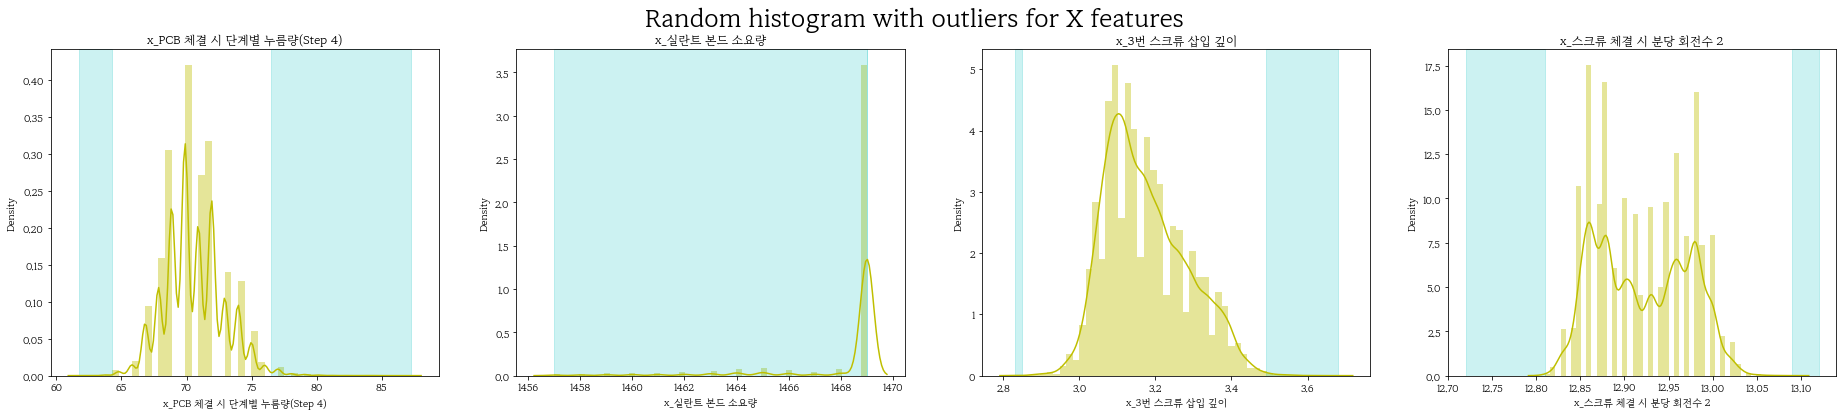

In [25]:
# 이상치 영역을 나타내는 그래프 그리기 - 랜덤하게 일부 컬럼만 선별하여
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

font_fname = r'C:\Users\h2est\AppData\Local\Microsoft\Windows\Fonts\MaruBuri-SemiBold.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(32, 6))

fig.suptitle('Random histogram with outliers for X features', fontsize=25)

rc1 = np.random.randint(1, len(train_x.columns))
lower, upper = check_outlier(train_x, rc1)

# 컬럼별 데이터 분포 확인하기
sns.distplot(train_x.iloc[:, rc1], color = 'y', ax = ax1)

# 이상치 영역 박스 그리기
ax1.axvspan(lower, train_x.iloc[:, rc1].min(), alpha=0.2, color='c')
ax1.axvspan(upper, train_x.iloc[:, rc1].max(), alpha=0.2, color='c')
ax1.set_title(train_x.columns[rc1])


rc2= np.random.randint(1, len(train_x.columns))
lower, upper = check_outlier(train_x, rc2)

sns.distplot(train_x.iloc[:, rc2], color = 'y', ax = ax2)

ax2.axvspan(lower, train_x.iloc[:, rc2].min(), alpha=0.2, color='c')
ax2.axvspan(upper, train_x.iloc[:, rc2].max(), alpha=0.2, color='c')
ax2.set_title(train_x.columns[rc2])


rc3 = np.random.randint(1, len(train_x.columns))
lower, upper = check_outlier(train_x, rc3)

sns.distplot(train_x.iloc[:, rc3], color = 'y', ax = ax3)

ax3.axvspan(lower, train_x.iloc[:, rc3].min(), alpha=0.2, color='c')
ax3.axvspan(upper, train_x.iloc[:, rc3].max(), alpha=0.2, color='c')
ax3.set_title(train_x.columns[rc3])


rc4 = np.random.randint(1, len(train_x.columns))
lower, upper = check_outlier(train_x, rc4)

sns.distplot(train_x.iloc[:, rc4], color = 'y', ax = ax4)

ax4.axvspan(lower, train_x.iloc[:, rc4].min(), alpha=0.2, color='c')
ax4.axvspan(upper, train_x.iloc[:, rc4].max(), alpha=0.2, color='c')
ax4.set_title(train_x.columns[rc4])

plt.show()

    
# 특정 컬럼들에서 이상치가 넓은 면적으로 보이는 경우 삭제 후 모델링 진행이 필요해보임. 

In [26]:
new_cat = train_x.corr()[['x_PCB 체결 시 단계별 누름량(Step 2)', 'x_방열 재료 2 무게', 'x_방열 재료 3 무게']]
new_cat[new_cat >= np.abs(0.7)]

# x_PCB 체결 시 단계별 누름량(Step 2)의 경우 삭제해도 무방할 듯으로 판단되며
# 방열재료 2, 3의 무게 데이터의 경우 불균형을 처리할 수 있는 부분이 필요해보임 

,x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 2 무게,x_방열 재료 3 무게
x_PCB 체결 시 단계별 누름량(Step 1),NaN,NaN,NaN
x_PCB 체결 시 단계별 누름량(Step 2),1.0,NaN,NaN
x_방열 재료 1 무게,NaN,NaN,NaN
x_PCB 체결 시 단계별 누름량(Step 3),NaN,NaN,NaN
x_PCB 체결 시 단계별 누름량(Step 4),NaN,NaN,NaN
x_방열 재료 1 면적,NaN,NaN,NaN
x_방열 재료 2 면적,NaN,NaN,NaN
x_방열 재료 3 면적,NaN,NaN,NaN
x_방열 재료 2 무게,NaN,1.000000,0.908978
x_방열 재료 3 무게,NaN,0.908978,1.000000


In [27]:
train_x.drop(columns=['x_PCB 체결 시 단계별 누름량(Step 2)'], axis=1, inplace=True)
new_fm1.drop(columns=['x_PCB 체결 시 단계별 누름량(Step 2)'], axis=1, inplace=True)

# 밀도기반 비지도학습 DBSCAN으로 이상치 탐지 --> 실패
- 코드 공유 안 합니다

# Isolation Forest를 통해 이상치 탐지

- 밀도기반 이상치 탐지

In [28]:
from sklearn.ensemble import IsolationForest

# train_x 변수 이상치 확인
clf = IsolationForest(max_samples='auto', random_state=2022)
# clf.fit(train_x)
pred_isf = clf.fit_predict(train_x)
pred_isf

array([-1,  1,  1, ...,  1,  1,  1])

In [29]:
pd.Series(pred_isf).value_counts() 
#전체 데이터에 대하여 이상치로 볼 수 있는 값은 400여개 정도 (컬럼 하나 삭제하게 되었을 때 이상치 값이 늘어나는 현상이 보여짐)

 1    39160
-1      447
dtype: int64

In [30]:
pred_isf_test = clf.fit_predict(new_fm1)
pd.Series(pred_isf_test).value_counts() #테스트 데이터에 대하여 이상치는 300여개(컬럼 하나를 삭제하고 났을 때 훈련데이터보다 테스트 데이터의 이상치값이 더 커졌음)

 1    39050
-1      558
dtype: int64

In [31]:
# isolation forest에 대한 평가 점수 및 이상값에 대한 값을 데이터 프레임으로 만들기
eval_score = clf.decision_function(train_x)
anomaly_val = clf.fit_predict(train_x)
after_clf = pd.DataFrame(train_x.index)
after_clf['scores']= eval_score
after_clf['anomaly']= anomaly_val
after_clf.set_index(['ID'], drop=True, inplace=True)
after_clf

,scores,anomaly
ID,,
0,-0.025610,-1
1,0.035208,1
2,0.034208,1
3,-0.012323,-1
4,0.016949,1
...,...,...
39602,0.074154,1
39603,0.024192,1
39604,0.070602,1


In [32]:
anomaly_data = after_clf.loc[after_clf['anomaly']==-1] # 이상값은 -1으로 나타낸다.
anomaly_data

,scores,anomaly
ID,,
0,-0.025610,-1
3,-0.012323,-1
9,-0.022467,-1
23,-0.043520,-1
24,-0.003055,-1
...,...,...
37968,-0.000013,-1
38618,-0.021234,-1
39138,0.017978,-1


In [33]:
eval_score_test = clf.decision_function(new_fm1)
anomaly_val_test = clf.fit_predict(new_fm1)
after_clf_test = pd.DataFrame(new_fm1.index)
after_clf_test['scores_test']= eval_score_test
after_clf_test['anomaly_test']= anomaly_val_test
after_clf_test.set_index(['ID'], drop=True, inplace=True)
after_clf_test

,scores_test,anomaly_test
ID,,
0,0.054300,1
1,0.070216,1
2,-0.022699,-1
3,0.059721,1
4,0.044721,1
...,...,...
39603,0.094027,1
39604,0.059792,1
39605,0.079136,1


In [34]:
anomaly_data_test = after_clf_test.loc[after_clf_test['anomaly_test']==-1]
anomaly_data_test

,scores_test,anomaly_test
ID,,
2,-0.022699,-1
11,0.008034,-1
21,-0.011584,-1
24,-0.014195,-1
26,-0.022729,-1
...,...,...
39260,0.015726,-1
39275,-0.027520,-1
39367,-0.029855,-1


In [35]:
pred_isf_y = clf.fit_predict(train_y)
pd.Series(pred_isf_y).value_counts() 

 1    35234
-1     4373
dtype: int64

In [36]:
pred_isf_train = clf.fit_predict(pd.concat([train_x, train_y], axis=1))
pd.Series(pred_isf_train).value_counts() 

# 독립, 종속변수 전체로 볼 경우 이상치는 10개 정도 더 늘어났다라고 판단할 수 있음

 1    39150
-1      457
dtype: int64

# LOF (Local OutlierFactor) 기법으로 이상치 확인하기

In [37]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(algorithm='auto', metric='mahalanobis', n_jobs=-1, novelty=False)
pred_lof = lof.fit_predict(train_x)
pred_lof

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
pd.Series(pred_lof).value_counts() # isolation forest보다 훨씬 적게 이상치를 판단하고 있다고 볼 수 있음

 1    39464
-1      143
dtype: int64

In [39]:
pred_lof_test = lof.fit_predict(new_fm1)
pd.Series(pred_lof_test).value_counts()

 1    39441
-1      167
dtype: int64

In [40]:
pred_lof_train = lof.fit_predict(pd.concat([train_x, train_y], axis=1))
pd.Series(pred_lof_train).value_counts() 

 1    39483
-1      124
dtype: int64

In [41]:
lof = LocalOutlierFactor(algorithm='auto', n_jobs=-1, novelty=False)
pred_lof_y = lof.fit_predict(train_y)
pd.Series(pred_lof_y).value_counts() 

 1    39435
-1      172
dtype: int64

In [42]:
after_lof = pd.DataFrame(train_x.index)
after_lof['anomaly_train_x']= pred_lof
after_lof['anomaly_train_y']= pred_lof_y
# after_lof['anomaly_test'] = pred_lof_test
after_lof['anomaly_train'] = pred_lof_train
after_lof.set_index(['ID'], drop=True, inplace=True)
after_lof

,anomaly_train_x,anomaly_train_y,anomaly_train
ID,,,
0,1,-1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
39602,1,1,1
39603,1,1,1
39604,1,1,1


In [43]:
# 특정 데이터에 한해서는 이상치로 보았으나 그 외에는 이상치로 보지 않은 경우
after_lof.loc[(after_lof.anomaly_train_x != after_lof.anomaly_train_y) | (after_lof.anomaly_train_y != after_lof.anomaly_train)]

,anomaly_train_x,anomaly_train_y,anomaly_train
ID,,,
0,1,-1,1
144,1,-1,1
177,1,-1,1
250,-1,1,-1
253,1,-1,-1
...,...,...,...
38956,1,-1,1
39076,1,-1,1
39082,1,-1,1


In [44]:
# 세 가지 데이터에 대하여 동시에 이상치로 보지 않은 데이터의 수는 39284개
after_lof.loc[(after_lof.anomaly_train_x == after_lof.anomaly_train_y) & (after_lof.anomaly_train_y == after_lof.anomaly_train)]

,anomaly_train_x,anomaly_train_y,anomaly_train
ID,,,
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
...,...,...,...
39602,1,1,1
39603,1,1,1
39604,1,1,1


In [45]:
outlier_idx = after_lof.loc[(after_lof.anomaly_train_x != after_lof.anomaly_train_y) | (after_lof.anomaly_train_y != after_lof.anomaly_train)].index

outlier_idx
# 삭제를 하는 경우 모델링 후 제출 시 영향이 있기 때문에 이상치의 영향력을 최소화할 수 있는 방법 찾아서 전처리 진행하기
# 이상치를 갖는 데이터 컬럼 하나하나 처리해주기 보다는 전체적인 영향력을 최소화하는 방법으로 모델링 진행

Int64Index([    0,   144,   177,   250,   253,   459,   672,   688,   764,
              881,
            ...
            38297, 38443, 38521, 38579, 38702, 38956, 39076, 39082, 39376,
            39479],
           dtype='int64', name='ID', length=323)

## 이상치 데이터 처리하기

In [46]:
# 중위수 절대 편차 사용 -> 이상치에 로버스트한 중간값을 활용한 MAD 확인하기

import numpy as np
def get_median_absolute_deviation(data):
    return np.median(np.absolute(data - np.median(data, axis=0)), axis=0)

In [47]:
for c in range(len(train_x.columns)):
    print(train_x.columns[c], ':', check_outlier(train_x, c))
# 방열 재료 2, 3의 무게에 대한 데이터로 인해 전체적인 이상치 영향력이 있어 보임. -> 값 변경 

x_PCB 체결 시 단계별 누름량(Step 1) : (61.876487731933594, 74.11251068115234)
x_방열 재료 1 무게 : (55.02000427246094, 81.81999206542969)
x_PCB 체결 시 단계별 누름량(Step 3) : (100.15649795532227, 104.93649673461914)
x_PCB 체결 시 단계별 누름량(Step 4) : (64.2755012512207, 76.51149368286133)
x_방열 재료 1 면적 : (24.919997215270996, 32.84000301361084)
x_방열 재료 2 면적 : (66.04500198364258, 172.56499099731445)
x_방열 재료 3 면적 : (75.40999603271484, 377.0899887084961)
x_방열 재료 2 무게 : (0.0, 0.0)
x_방열 재료 3 무게 : (0.0, 0.0)
x_커넥터 위치 기준 좌표 : (4.315000534057617, 4.434999465942383)
x_각 안테나 패드 위치(높이) 차이 : (0.08499999344348907, 0.20499999821186066)
x_1번 안테나 패드 위치 : (13.290000438690186, 13.450000286102295)
x_2번 안테나 패드 위치 : (13.284999370574951, 13.485000133514404)
x_3번 안테나 패드 위치 : (13.364999294281006, 13.565000057220459)
x_4번 안테나 패드 위치 : (13.455000400543213, 13.574999332427979)
x_5번 안테나 패드 위치 : (13.37000036239624, 13.53000020980835)
x_1번 스크류 삽입 깊이 : (2.9350003004074097, 3.53499972820282)
x_2번 스크류 삽입 깊이 : (2.8449997901916504, 3.5250000953674316)


In [48]:
for c in range(len(train_x.iloc[outlier_idx].columns)):
    print(train_x.iloc[outlier_idx].columns[c], ':', check_outlier(train_x.iloc[outlier_idx], c))

x_PCB 체결 시 단계별 누름량(Step 1) : (61.876487731933594, 74.11251068115234)
x_방열 재료 1 무게 : (57.31999206542969, 78.52000427246094)
x_PCB 체결 시 단계별 누름량(Step 3) : (100.15424919128418, 104.92825126647949)
x_PCB 체결 시 단계별 누름량(Step 4) : (64.2755012512207, 76.51149368286133)
x_방열 재료 1 면적 : (25.11750030517578, 32.25749969482422)
x_방열 재료 2 면적 : (70.77750205993652, 165.7574977874756)
x_방열 재료 3 면적 : (64.26250839233398, 380.7224998474121)
x_방열 재료 2 무게 : (0.0, 0.0)
x_방열 재료 3 무게 : (0.0, 0.0)
x_커넥터 위치 기준 좌표 : (4.315000534057617, 4.434999465942383)
x_각 안테나 패드 위치(높이) 차이 : (0.08499999344348907, 0.20499999821186066)
x_1번 안테나 패드 위치 : (13.290000438690186, 13.450000286102295)
x_2번 안테나 패드 위치 : (13.292499542236328, 13.47249984741211)
x_3번 안테나 패드 위치 : (13.347501277923584, 13.567498683929443)
x_4번 안테나 패드 위치 : (13.455000400543213, 13.574999332427979)
x_5번 안테나 패드 위치 : (13.37000036239624, 13.53000020980835)
x_1번 스크류 삽입 깊이 : (2.8700003623962402, 3.5899996757507324)
x_2번 스크류 삽입 깊이 : (2.804999828338623, 3.565000057220459)
x_3

In [49]:
from statsmodels import robust
for col in train_x.iloc[outlier_idx].columns:
    print(train_x.iloc[outlier_idx][[col]].apply(lambda x: robust.mad(x)))

x_PCB 체결 시 단계별 누름량(Step 1)    3.023028
dtype: float64
x_방열 재료 1 무게    3.854775
dtype: float64
x_PCB 체결 시 단계별 누름량(Step 3)    0.117129
dtype: float64
x_PCB 체결 시 단계별 누름량(Step 4)    3.023028
dtype: float64
x_방열 재료 1 면적    1.334341
dtype: float64
x_방열 재료 2 면적    14.336761
dtype: float64
x_방열 재료 3 면적    61.972777
dtype: float64
x_방열 재료 2 무게    0.0
dtype: float64
x_방열 재료 3 무게    0.0
dtype: float64
x_커넥터 위치 기준 좌표    0.029652
dtype: float64
x_각 안테나 패드 위치(높이) 차이    0.029652
dtype: float64
x_1번 안테나 패드 위치    0.029651
dtype: float64
x_2번 안테나 패드 위치    0.029653
dtype: float64
x_3번 안테나 패드 위치    0.044478
dtype: float64
x_4번 안테나 패드 위치    0.014826
dtype: float64
x_5번 안테나 패드 위치    0.029651
dtype: float64
x_1번 스크류 삽입 깊이    0.118608
dtype: float64
x_2번 스크류 삽입 깊이    0.133434
dtype: float64
x_3번 스크류 삽입 깊이    0.118608
dtype: float64
x_4번 스크류 삽입 깊이    0.133434
dtype: float64
x_커넥터 1번 핀 치수    0.029652
dtype: float64
x_커넥터 2번 핀 치수    0.029652
dtype: float64
x_커넥터 3번 핀 치수    0.029652
dtype: float64
x_커넥터 4번 핀 치수  

- MAD를 이용한 편차값을 통해 상,하한값으로 이상치 처리 가능할 것으로 보여짐. (최소,댓값과 편차의 차이 등 활용)

In [50]:
print(train_x[['x_방열 재료 2 무게']].apply(lambda x: robust.mad(x)))
print(train_x[['x_방열 재료 3 무게']].apply(lambda x: robust.mad(x)))

x_방열 재료 2 무게    0.0
dtype: float64
x_방열 재료 3 무게    0.0
dtype: float64


In [51]:
train_x.drop(columns=['x_방열 재료 2 무게', 'x_방열 재료 3 무게'], axis=1, inplace=True)
new_fm1.drop(columns=['x_방열 재료 2 무게', 'x_방열 재료 3 무게'], axis=1, inplace=True)

In [52]:
# 윈저라이징 기법으로 이상치 부분 처리 가능 (삭제 대신으로 사용할 수 있음)
# replace the outliers with other values. 
# Common is replacing the outliers on the upper side with 95% percentile value and outlier on the lower side with 5% percentile. 
# Z-score에서 표준편차가 3인 경우 일반적으로 많이 사용

from scipy.stats import mstats
for c in train_x.columns:
    print(c, mstats.winsorize(train_x.iloc[outlier_idx][c], axis=1))        

x_PCB 체결 시 단계별 누름량(Step 1) [70.54399872 67.48500061 77.68199921 70.54399872 69.52400208 61.36600113
 68.5039978  68.5039978  68.5039978  67.48500061 68.5039978  69.52400208
 72.58300018 70.54399872 69.52400208 66.46499634 64.42500305 66.46499634
 68.5039978  66.46499634 69.52400208 69.52400208 71.56300354 72.58300018
 63.40599823 69.52400208 78.70200348 71.56300354 69.52400208 72.58300018
 69.52400208 69.52400208 70.54399872 66.46499634 69.52400208 68.5039978
 66.46499634 70.54399872 70.54399872 71.56300354 69.52400208 68.5039978
 74.6230011  68.5039978  68.5039978  72.58300018 71.56300354 69.52400208
 71.56300354 67.48500061 74.6230011  70.54399872 74.6230011  72.58300018
 66.46499634 66.46499634 70.54399872 69.52400208 68.5039978  72.58300018
 70.54399872 69.52400208 69.52400208 66.46499634 69.52400208 67.48500061
 70.54399872 67.48500061 70.54399872 66.46499634 66.46499634 69.52400208
 70.54399872 69.52400208 69.52400208 71.56300354 73.60299683 67.48500061
 66.46499634 68.5039978  6

In [53]:
from scipy.stats import mstats
for c in train_x.columns:
    train_x.iloc[outlier_idx].loc[:, c] = mstats.winsorize(train_x.iloc[outlier_idx][c].values, axis=1)
train_x.iloc[outlier_idx].head(3)  

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.543999,67.470001,101.891998,74.983002,29.450001,62.380001,245.710007,4.34,0.18,13.34,13.37,13.40,13.52,13.44,3.11,3.17,3.06,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.41,-16.360001,-17.030001,21.200001,20.990000,21.280001,21.09,0.29,1463,9706.030273,137.043594,135.359222,147.837967,134.313477,125.605431,136.721420,125.028259
144,67.485001,59.770000,103.154999,67.845001,28.120001,101.330002,183.320007,4.38,0.12,13.39,13.40,13.51,13.51,13.49,3.22,3.16,3.12,3.20,2.16,2.12,2.13,2.11,2.16,2.19,1.51,1.67,1.47,1.67,12.95,12.99,12.94,12.92,-16.24,-16.260000,-16.940001,21.150000,21.020000,21.129999,21.10,0.13,1469,14721.030273,127.074249,129.403641,138.681808,127.734367,133.427460,131.745575,129.317657
177,77.681999,65.870003,103.157997,78.042000,27.459999,245.589996,214.130005,4.32,0.14,13.43,13.44,13.55,13.57,13.53,3.30,3.18,3.15,3.26,2.15,2.11,2.12,2.08,2.12,2.16,1.49,1.83,1.45,1.64,12.89,12.99,12.94,12.85,-15.69,-15.820000,-16.430000,21.129999,21.049999,21.139999,21.18,0.13,1469,14996.129883,142.259415,133.503799,136.791260,143.527374,133.350540,126.991196,129.935226


In [54]:
for c in train_y.columns:
    train_y.iloc[outlier_idx].loc[:, c] = mstats.winsorize(train_y.iloc[outlier_idx][c].values, axis=1)
train_y.iloc[outlier_idx].head(3) 

,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4)
ID,,,,,,,,,,
0,2.056,1.456,1.680,10.502,29.632000,16.083,4.276,-25.381001,-22.768999,23.792
144,1.004,0.826,0.653,18.069,33.125999,17.910,2.912,-23.785000,-20.976999,25.892
177,0.772,0.192,0.269,12.525,34.118999,16.722,2.513,-25.104000,-22.141001,24.364


In [55]:
pred_lof_train = lof.fit_predict(pd.concat([train_x, train_y], axis=1))
pd.Series(pred_lof_train).value_counts()  # 전체 데이터에 한해서 다시 이상치 전처리 필요해보임

 1    38071
-1     1536
dtype: int64

In [56]:
for c in pd.concat([train_x, train_y], axis=1).columns:
    pd.concat([train_x, train_y], axis=1).loc[:, c] = mstats.winsorize(pd.concat([train_x, train_y], axis=1)[c].values, axis=0, limits = [0.05, 0.05])
pd.concat([train_x, train_y], axis=1).head(3) 

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,70.543999,67.470001,101.891998,74.983002,29.450001,62.380001,245.710007,4.34,0.18,13.34,13.37,13.40,13.52,13.44,3.11,3.17,3.06,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.410000,-16.360001,-17.030001,21.200001,20.990000,21.280001,21.090000,0.29,1463,9706.030273,137.043594,135.359222,147.837967,134.313477,125.605431,136.721420,125.028259,2.056,1.456,1.680,10.502,29.632000,16.083,4.276,-25.381001,-22.768999,23.792
1,69.524002,65.169998,101.944000,72.943001,28.730000,61.230000,233.610001,4.38,0.18,13.33,13.33,13.46,13.51,13.42,2.97,3.11,2.91,3.20,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.059999,-16.110001,-16.740000,21.160000,21.030001,21.160000,21.129999,0.13,1463,10423.429688,133.736694,135.979813,149.924698,123.630585,127.893333,143.322662,124.877312,1.446,1.184,1.268,18.507,33.179001,16.736,3.229,-26.618999,-22.573999,24.691
2,72.583000,64.070000,103.153000,72.943001,28.809999,105.769997,272.200012,4.36,0.15,13.36,13.36,13.39,13.51,13.43,3.04,3.04,3.01,3.12,2.07,2.06,2.04,2.07,2.10,2.26,1.49,1.69,1.46,1.68,12.97,12.87,12.87,13.00,-16.160000,-16.170000,-16.760000,21.129999,21.030001,21.170000,21.120001,0.14,1468,10948.530273,132.805115,131.055359,146.814590,128.939072,127.012192,140.395691,122.238235,1.251,0.665,0.782,14.082,31.801001,17.080,2.839,-26.238001,-22.169001,24.649


In [57]:
pred_lof_train_after_treatment = lof.fit_predict(pd.concat([train_x, train_y], axis=1))
after_lof['anomaly_train_overall_after_outlier_treatment1'] = pred_lof_train_after_treatment
after_lof

,anomaly_train_x,anomaly_train_y,anomaly_train,anomaly_train_overall_after_outlier_treatment1
ID,,,,
0,1,-1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
39602,1,1,1,1
39603,1,1,1,1
39604,1,1,1,1


In [58]:
pd.Series(lof.fit_predict(train_x)).value_counts()

 1    38044
-1     1563
dtype: int64

In [59]:
for c in new_fm1.columns:
    new_fm1.loc[:, c] = mstats.winsorize(new_fm1[c].values, axis=1)
new_fm1.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,68.504,76.67,101.867,73.963,30.51,63.57,239.80,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.17,-16.17,-16.84,21.22,21.06,21.21,21.20,0.16,1469,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,67.485,69.37,101.992,67.845,28.03,116.99,189.23,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.35,-15.25,-16.01,21.21,20.99,21.26,21.15,0.27,1462,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,69.524,68.97,101.884,77.022,29.65,205.68,214.93,4.43,0.20,13.32,13.35,13.40,13.52,13.41,3.07,3.12,3.05,3.17,2.13,2.10,2.29,2.15,2.24,2.26,1.50,1.69,1.47,1.71,12.93,12.90,13.02,13.01,-16.27,-16.35,-16.95,21.16,21.05,21.15,21.19,0.14,1469,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628


# 모델링 진행하기

## Linear Regression

In [60]:
import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 49), (7922, 49), (31685, 10), (7922, 10))

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

seed_everything(2022)
lr_model = LinearRegression()
LR = MultiOutputRegressor(lr_model).fit(train_x, train_y)
print('Done.')

Done.


In [63]:
print(f'R2 score of LR (training): {round(LR.score(train_x, train_y), 3)}')
print(f'R2 score of LR (validation): {round(LR.score(X_val, y_val), 3)}')

R2 score of LR (training): 0.035
R2 score of LR (validation): 0.04


In [64]:
preds = LR.predict(X_val)
print('Done.')

Done.


In [65]:
from sklearn.metrics import mean_squared_error
print("y MSE:%.4f" % mean_squared_error(y_val, preds))

y MSE:1.8523


In [66]:
preds_tr = LR.predict(X_train)
preds_val = LR.predict(X_val)

print(f'lg_nrmse score of LR (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of LR (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of LR (training): 1.893
lg_nrmse of LR (validation): 1.857


In [67]:
preds_test = LR.predict(new_fm1)
preds_test.shape

(39608, 10)

In [68]:
submission = pd.read_csv('./sample_submission.csv')

for idx, col in enumerate(submission.columns[1:11]):
    # if col=='ID':
    #     continue
    submission[col] = preds_test[:,idx]
submission.drop(columns=submission.columns[11:], axis=1, inplace=True)

submission.to_csv('./submit_LR_after_treating_outliers.csv', index=False, encoding='utf-8')
print('Done.')

Done.


In [69]:
submission.head(3)

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10
0,TEST_00001,1.463254,1.197141,1.139771,12.922757,31.004982,16.285273,3.211385,-26.124004,-22.166134,24.473918
1,TEST_00002,1.499787,1.217018,1.146986,13.175929,30.881473,16.503000,3.188296,-26.114809,-22.264793,24.405447
2,TEST_00003,1.382978,1.066566,1.021607,14.611323,31.832321,16.217581,3.050125,-26.063388,-22.351800,24.452902


## Random Forest model

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 49), (7922, 49), (31685, 10), (7922, 10))

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# param_grid ={'max_depth':[None, 5, 10, 20, 30],
#             'n_estimators':[50, 100, 150, 200, 250]}

seed_everything(2022)
rfr_model = RandomForestRegressor(max_depth= 30, n_estimators= 50, criterion="mse", random_state=2022)

# random_search = GridSearchCV(rfr_model, param_grid, cv=10)
# random_search.fit(train_x, train_y)
print(rfr_model)


model = MultiOutputRegressor(rfr_model).fit(train_x, train_y)
print('Done.')

RandomForestRegressor(max_depth=30, n_estimators=50, random_state=2022)
Done.


In [73]:
print(f'R2 score of RF (training): {round(model.score(train_x, train_y), 3)}')
print(f'R2 score of RF (validation): {round(model.score(X_val, y_val), 3)}')

R2 score of RF (training): 0.848
R2 score of RF (validation): 0.848


In [74]:
preds = model.predict(X_val)

from sklearn.metrics import mean_squared_error
print("y MSE:%.4f" % mean_squared_error(y_val, preds))
print('Done.')

y MSE:0.2999
Done.


In [75]:
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of LR (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of LR (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')

lg_nrmse score of LR (training): 0.745
lg_nrmse of LR (validation): 0.734


In [76]:
preds_test = model.predict(new_fm1)
preds_test.shape

(39608, 10)

In [77]:
submission = pd.read_csv('./sample_submission.csv')

for idx, col in enumerate(submission.columns[1:11]):
    # if col=='ID':
    #     continue
    submission[col] = preds_test[:,idx]
submission.drop(columns=submission.columns[11:], axis=1, inplace=True)

submission.to_csv('./submit_RF_after_treating_outliers.csv', index=False, encoding='utf-8')
print('Done.')

Done.


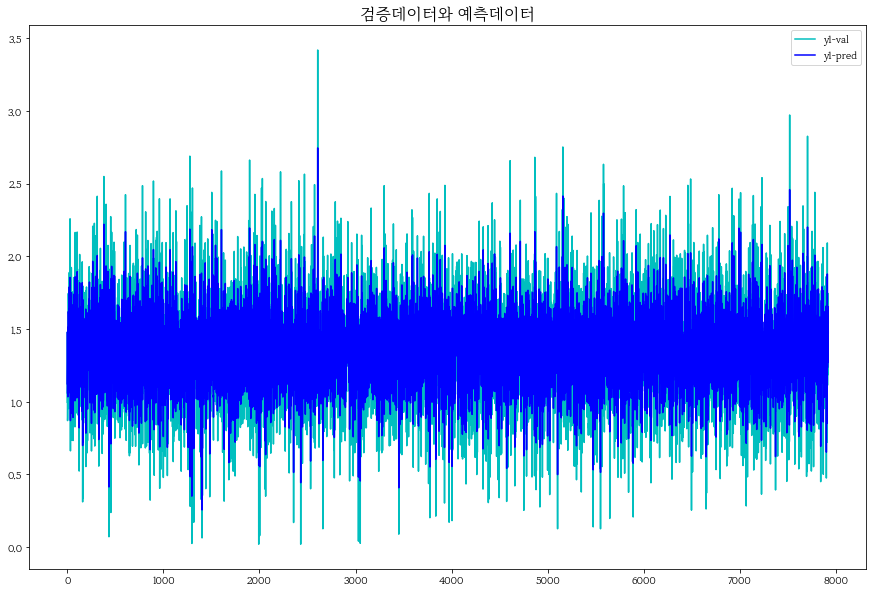

In [78]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 - 첫번째 컬럼인 안테나 Gain 평균 (각도1)에 대하여 확인하기

plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

Anomaly Detection이 적용되는 일반적인 산업 현장에서는 정상 sample보다 비정상 sample의 발생 빈도가 현저히 적기 때문에 Class-Imbalance(불균형) 문제를 자주 겪게 됩니다.<br>
관측값을 변경하여 이상치를 처리하고자 할 때 가장 중요한 것이 절사값 (winsoring cutoff) k의 선택이다. 절사값이 클수록 총합추정시 이상치의 자료값을 많이 반영하게 되고 절사값이 작을수록 추정시에 이상치의 영향력을 감소시킬 수 있다.


- 모델링 결과
1) 예상했던 성능보다 훨씬 좋게 나왔으나 극단적인 수치가 아닌가 싶음.
2) 상관관계가 너무 높은 컬럼들을 제거한 경우 훨씬 유의미해보이는 결과가 나옴을 확인할 수 있음
3) y변수 부분의 컬럼들을 그대로 살려둘 경우 결과가 과연 그대로 유지될 것인가...도 의문...
4) 전반적인 데이터에 대한 이상치를 처리하는 것이 필요해보임 (윈저화 기법 이용) <- 데이터 하나의 다른 데이터에 대한 영향력을 무시할 수 없음  

- 의문점:
1. 제출 데이터의 컬럼수를 줄이면 안되는가 (14개 컬럼 모두 이용??)
2. 테스트 데이터에 대하여 트레이닝 시 사용하지 않고 전처리 진행 가능여부

- expected plan:
1) 다양한 모델들 사용 -> 추가로 딥러닝 모델 확인하고 모델링 진행
2) 윈저화 아웃라이어 이용 (이전 아웃라이어로 판단되는 데이터들 값 변환)
    - 코드 추가 재확인 (해당 부분)
3) 불필요한 컬럼들 삭제하고 일부 컬럼들 판별하여 조합
4) 교차 검증 등 여러 가지 전처리, 모델 성능 결과 확인하기

- 참고 <br>
https://www.kaggle.com/code/chrizzles/finding-frauds-with-robust-outlier-detection<br>
https://partrita.github.io/posts/isolation-forest/<br>
https://featuretools.alteryx.com/en/stable/guides/feature_selection.html#Remove-Single-Value-Features<br>
https://claryk.tistory.com/6<br>
https://koreascience.kr/article/JAKO201607433788377.pdf<br>
http://www.koreascience.kr/article/JAKO202130053209368.pdf<br>
https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755<br>
https://www.datasciencesmachinelearning.com/2018/11/handling-outliers-in-python.html